In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.12.0


In [2]:
#Import datasets
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
#Map each image to a single label
class_names = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Boot']

In [4]:
#60000 labels on training set, each image is represented as 28px28p
train_images.shape

(60000, 28, 28)

In [5]:
#number of labels inside training sets
len(train_labels)

60000

In [6]:
#Each label is an interger from 0 to 9
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
#10000 labels inside test datasets with each image is represented as 28px28p
test_images.shape

(10000, 28, 28)

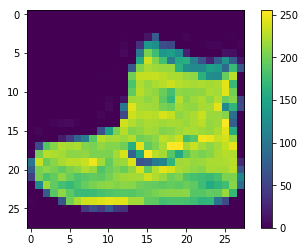

In [8]:
#Preprocess data
#Data must be preprocessed before training the network

plt.figure()
#Plot object assigned to number of array as x
plt.imshow(train_images[0])
#Plot color bar
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
#Scale values to range from 0 to 1 before feeding to neural network
#--> divide the values by 255
#preprocess training set and testing set in the same way

train_images = train_images/255
test_images = test_images/255

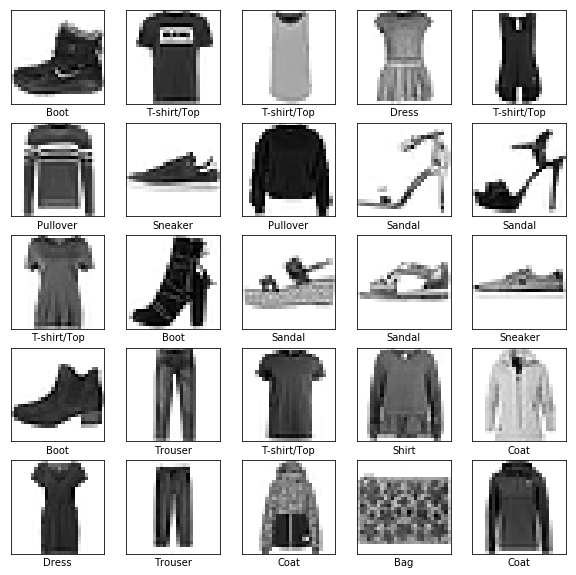

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    #Set locations and labels
    plt.xticks([]) #a list of explicit label to place at the given locs
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [11]:
#Set up model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [12]:
#Compile model
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
#Train the model
#epoch = number of times you want go through training set
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 6s 104us/step - loss: 0.4951 - acc: 0.8255
Epoch 2/5
60000/60000 [==============================] - 5s 88us/step - loss: 0.3750 - acc: 0.8647
Epoch 3/5
60000/60000 [==============================] - 5s 84us/step - loss: 0.3361 - acc: 0.8770
Epoch 4/5
60000/60000 [==============================] - 5s 82us/step - loss: 0.3110 - acc: 0.8867
Epoch 5/5
60000/60000 [==============================] - 5s 91us/step - loss: 0.2926 - acc: 0.8932


In [14]:
#Evaluate accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 45us/step
Test accuracy: 0.8588


In [15]:
#Make prediction
#Prediction about some images with the model trained
predictions = model.predict(test_images)

In [16]:
predictions[0]

array([1.9895090e-06, 5.0278821e-09, 3.3634623e-07, 6.1046869e-08,
       4.4449982e-07, 1.8974327e-03, 7.7204923e-08, 1.0625484e-02,
       8.3066989e-06, 9.8746580e-01], dtype=float32)

In [17]:
#See which label has highes confidence value
np.argmax(predictions[0])

9

In [18]:
test_labels[0]

9

In [19]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [20]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    thisplot = plt.bar(range(10), predictions_array, color = "#ff1493")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

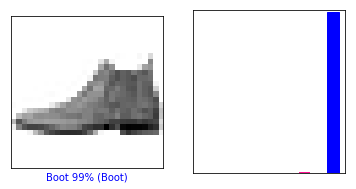

In [21]:
#Investigate the 1st image
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

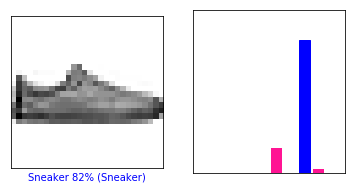

In [29]:
#Investigate the 10th image
i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

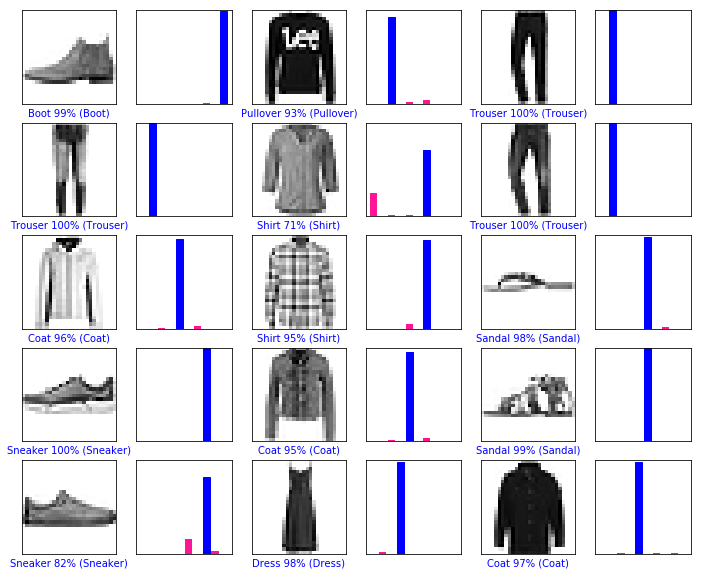

In [33]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [38]:
#Grab an image from dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [40]:
#Add image to a batch where it is the onlu member
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [41]:
#Predict the img

predictions_single = model.predict(img)

print(predictions_single)

[[1.9895051e-06 5.0278821e-09 3.3634592e-07 6.1046755e-08 4.4449897e-07
  1.8974299e-03 7.7204923e-08 1.0625480e-02 8.3066825e-06 9.8746580e-01]]


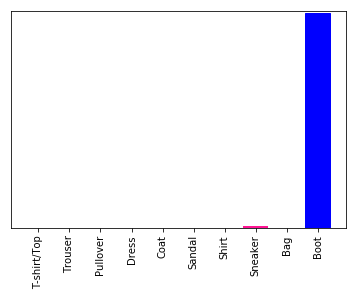

In [47]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=90)

In [48]:
#model.predict returns a list of lists, one of each img in the batch of data
#Grab predictions for img in the batch

np.argmax(predictions_single[0])

9

In [49]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.